<a href="https://colab.research.google.com/github/vddavydova/public/blob/main/colab/project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Анализ продаж видеоигр

____

**Author(s):** Чалов Иван Александрович ivan.chalov2000@yandex.ru <br>
    
**Description:** Видеоигры важны для меня по двум причинам. Они не только развлекают и отвлекают, но и помогают улучшить стратегическое мышление. Я выбрал данные о продажах видеоигр, потому что это это интересно для меня. Используя такие инструменты, как Pandas, Numpy, Seaborn и Plotly, я могу легко сравнить продажи на разных платформах или в разных странах. Кроме того, я могу использовать эти данные для создания графиков, которые можно использовать для дальнейшего анализа. В целом, анализ данных о продажах видеоигр — точно необычный и при этом эффективный способ получить представление об этой увлекательной индустрии. <br>

**У меня возникали проблемы с отображением графиков, если все сразу запускать, поэтому я дополнительно создал html файл, где отображены все графики.**

Стоит запускать все ячейки с самого начала и тогда все будет работать, если хочется посмотреть на проект в jupyter notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Вначале я загрузил данные, с которыми буду работать.

In [2]:
data = pd.read_csv('vgsales.csv')

#### Описание переменных:

Rank - Рейтинг общих продаж.

Name - Название игры.

Platform — Платформа выпуска игр (например, ПК, PS4 и т. д.).

Year - Год выхода игры.

Genre - Жанр игры.

Publisher - Издатель игры.

NA_Sales — Продажи в Северной Америке (в миллионах).

EU_Sales — Продажи в Европе (в миллионах).

JP_Sales — Продажи в Японии (в миллионах).

Other_Sales — Продажи в остальном мире (в миллионах).

Global_Sales — Общий объем продаж по всему миру.

In [3]:
data

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


По переменным Year и Publisher заметно, что в данных есть пропуски, поэтому хочется разобраться с ними, чтобы при анализе не возникли разные проблемы из-за них.

### Пропуски

In [5]:
data[data.isna().any(axis=1)].head(30)

Rank                                          Name Platform    Year  \
179    180                               Madden NFL 2004      PS2     NaN   
377    378                              FIFA Soccer 2004      PS2     NaN   
431    432                    LEGO Batman: The Videogame      Wii     NaN   
470    471                    wwe Smackdown vs. Raw 2006      PS2     NaN   
607    608                                Space Invaders     2600     NaN   
624    625                                     Rock Band     X360     NaN   
649    650      Frogger's Adventures: Temple of the Frog      GBA     NaN   
652    653   LEGO Indiana Jones: The Original Adventures      Wii     NaN   
711    713                                Call of Duty 3      Wii     NaN   
782    784                                     Rock Band      Wii     NaN   
1126  1128                       Call of Duty: Black Ops       PC     NaN   
1133  1135                                     Rock Band      PS3     NaN   
1303  1305                                Triple Play 99       PS     NaN   
1433  1435                  LEGO Harry Potter: Years 5-7      Wii     NaN   
1498  1500                    LEGO Batman: The Videogame      PSP     NaN   
1513  1515                                     Adventure     2600     NaN   
1585  1587                                        Combat     2600     NaN   
1649  1651                           NASCAR Thunder 2003      PS2     NaN   
1662  1664  Shrek / Shrek 2 2-in-1 Gameboy Advance Video      GBA  2007.0   
1697  1699                     Hitman 2: Silent Assassin       XB     NaN   
1837  1839                                     Rock Band      PS2     NaN   
1990  1992                   Legacy of Kain: Soul Reaver       PS     NaN   
2019  2021                          Donkey Kong Land III       GB     NaN   
2086  2088                  LEGO Harry Potter: Years 5-7     X360     NaN   
2113  2115                                Air-Sea Battle     2600     NaN   
2114  2116                                  Suikoden III      PS2     NaN   
2134  2136                                      Yakuza 4      PS3     NaN   
2145  2147                  LEGO Harry Potter: Years 5-7      PS3     NaN   
2173  2175                              Wheel of Fortune      PS2     NaN   
2222  2224                            Bentley's Hackpack      GBA  2005.0   

             Genre                               Publisher  NA_Sales  \
179         Sports                         Electronic Arts      4.26   
377         Sports                         Electronic Arts      0.59   
431         Action  Warner Bros. Interactive Entertainment      1.86   
470       Fighting                                     NaN      1.57   
607        Shooter                                   Atari      2.36   
624           Misc                         Electronic Arts      1.93   
649      Adventure            Konami Digital Entertainment      2.15   
652         Action                               LucasArts      1.54   
711        Shooter                              Activision      1.19   
782           Misc                               MTV Games      1.35   
1126       Shooter                              Activision      0.58   
1133          Misc                         Electronic Arts      0.99   
1303        Sports                                     NaN      0.81   
1433        Action  Warner Bros. Interactive Entertainment      0.76   
1498        Action  Warner Bros. Interactive Entertainment      0.57   
1513     Adventure                                   Atari      1.21   
1585        Action                                   Atari      1.17   
1649        Racing                                 Unknown      0.60   
1662          Misc                                     NaN      0.87   
1697        Action                       Eidos Interactive      0.76   
1837          Misc                         Electronic Arts      0.71   
1990        Action                

In [6]:
data['Year'][179] = 2003
data['Year'][377] = 2003
data['Year'][431] = 2008
data['Year'][470] = 2005
data['Publisher'][470] = 'THQ'
data['Year'][607] = 1980
data['Year'][624] = 2007
data['Year'][649] = 2001
data['Year'][652] = 2008
data['Year'][711] = 2006
data['Year'][782] = 2007
data['Year'][1126] = 2010
data['Year'][1133] = 2007
data['Year'][1303] = 1998
data['Publisher'][1303] = 'Electronic Arts'
data['Year'][1433] = 2011
data['Year'][1498] = 2008
data['Year'][1513] = 1980
data['Year'][1585] = 1980
data['Year'][1649] = 2002
data['Year'][1697] = 2002
data['Publisher'][1662] = 'Activision'
data['Year'][1837] = 2007
data['Year'][1990] = 1999
data['Year'][2019] = 1997

Я решил дополнить данные по этим 25 играм, потому что суммарно их продажи составляют довольно существенное число, особенно если увидеть порядок чисел далее по разбору.
Осташиеся пропусками уберем, потому что по отдельности продажи меньше 1 млн.

In [7]:
data = data[~data.isna().any(axis=1)]
data

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16314 rows x 11 columns]

Так как переменная rank практически совпадает с индексом, то столбик с rank удалим.

In [8]:
data.drop('Rank', axis = 1, inplace = True)

In [9]:
data

Name Platform    Year  \
0                                            Wii Sports      Wii  2006.0   
1                                     Super Mario Bros.      NES  1985.0   
2                                        Mario Kart Wii      Wii  2008.0   
3                                     Wii Sports Resort      Wii  2009.0   
4                              Pokemon Red/Pokemon Blue       GB  1996.0   
...                                                 ...      ...     ...   
16593                Woody Woodpecker in Crazy Castle 5      GBA  2002.0   
16594                     Men in Black II: Alien Escape       GC  2003.0   
16595  SCORE International Baja 1000: The Official Game      PS2  2008.0   
16596                                        Know How 2       DS  2010.0   
16597                                  Spirits & Spells      GBA  2003.0   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0            Sports    Nintendo     41.49     29.02      3.77         8.46   
1          Platform    Nintendo     29.08      3.58      6.81         0.77   
2            Racing    Nintendo     15.85     12.88      3.79         3.31   
3            Sports    Nintendo     15.75     11.01      3.28         2.96   
4      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16593      Platform       Kemco      0.01      0.00      0.00         0.00   
16594       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16595        Racing  Activision      0.00      0.00      0.00         0.00   
16596        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16597      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  
0             82.74  
1             40.24  
2             35.82  
3             33.00  
4             31.37  
...             ...  
16593          0.01  
16594          0.01  
16595          0.01  
16596          0.01  
16597          0.01  

[16314 rows x 10 columns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16314 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16314 non-null  object 
 1   Platform      16314 non-null  object 
 2   Year          16314 non-null  float64
 3   Genre         16314 non-null  object 
 4   Publisher     16314 non-null  object 
 5   NA_Sales      16314 non-null  float64
 6   EU_Sales      16314 non-null  float64
 7   JP_Sales      16314 non-null  float64
 8   Other_Sales   16314 non-null  float64
 9   Global_Sales  16314 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


Приведем переменные к нужным типам.

In [11]:
data['Name'] = data['Name'].astype('string')
data['Platform'] = data['Platform'].astype('category')
data['Year'] = data['Year'].astype('int')
data['Genre'] = data['Genre'].astype('category')
data['Publisher'] = data['Publisher'].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16314 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16314 non-null  string  
 1   Platform      16314 non-null  category
 2   Year          16314 non-null  int32   
 3   Genre         16314 non-null  category
 4   Publisher     16314 non-null  category
 5   NA_Sales      16314 non-null  float64 
 6   EU_Sales      16314 non-null  float64 
 7   JP_Sales      16314 non-null  float64 
 8   Other_Sales   16314 non-null  float64 
 9   Global_Sales  16314 non-null  float64 
dtypes: category(3), float64(5), int32(1), string(1)
memory usage: 1.0 MB


In [13]:
data.describe()

Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16314.000000  16314.000000  16314.000000  16314.000000  16314.000000   
mean    2006.398737      0.267055      0.148267      0.078725      0.048637   
std        5.841126      0.823297      0.509456      0.311673      0.190140   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16314.000000  
mean       0.542955  
std        1.567633  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.480000  
max       82.740000

Информация о видеоиграх собрана с 1980 г. по 2020 г. при этом 25% были выпущены с 1980 г. по 2003 г., 25% с 2003 г. по 2007 г., 25% с 2007 г. по 2010 г. и 25% с 2010 г. по 2020 г. Значит, в данных около 75% игр выпущены в 21 веке, и около 25% в 20 в. При этом почти 50% игр были выпущены с 2003 г. по 2010 г. 

#### Вопросы и гипотезы:

1) Cколько всего продаж у каждой платформы? Какой тренд продаж у 10 наиболее крупных платформ?

2) У игры появившейся позже 2000 г. в среднем продаж больше, чем у игры, выпущенной ранее 2000 г.

3) Во все года продаж в Америке и Европе суммарно больше чем в Японии и в других странах вместе взятых.

4) У какого издателя больше всего продаж? Какие средние продажи у 5 наиболее крупных издателей?

5) Какой жанр пользуется большей популярностью по продажам на каждом промежутке длиной в 10 лет с 1980 г. по 2019 г.? Отличаются ли любимые жанры в Америке, в Европе, в Японии на каждом промежутке?

6) С каждым годом значения общих продаж увеличиваются. Какой тренд по странам?

7) Топ самых продаваемых игр в Америке, в Европе, в Японии и в остальных странах.

### Cколько всего продаж у каждой платформы? Какой тренд продаж у 10 наиболее крупных платформ?

In [14]:
df = data.groupby(by="Platform")[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('Global_Sales', ascending = False)
df.head(10)

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
PS2         580.65    336.79    137.59       192.61       1247.51
X360        596.26    278.34     12.30        84.88        972.08
PS3         389.89    340.88     79.21       141.03        950.97
Wii         504.07    267.87     68.28        80.27        921.10
DS          388.53    194.05    175.02        60.29        818.91
PS          336.10    213.33    139.78        40.86        729.89
GBA         181.45     72.99     46.56         7.60        309.22
PSP         107.66     67.62     75.89        41.80        293.03
PS4          96.80    123.70     14.30        43.36        278.10
PC           92.62    138.16      0.17        24.57        256.33

In [15]:
df.shape

(31, 5)

Всего платформ - 31. Выведем для каждой платформы общие продажи.

In [16]:
df.head(31)['Global_Sales']

Platform
PS2     1247.51
X360     972.08
PS3      950.97
Wii      921.10
DS       818.91
PS       729.89
GBA      309.22
PSP      293.03
PS4      278.10
PC       256.33
GB       255.45
XB       253.28
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      91.65
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

Для наглядности построим график с продажами для каждой платформы.

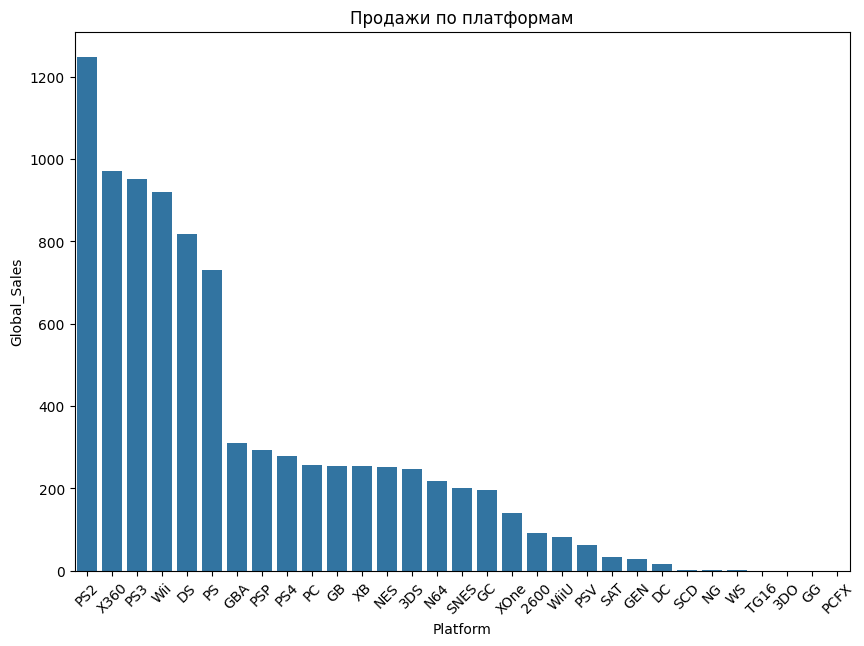

In [17]:
plt.figure(figsize=(10,7)) 
sns.barplot(x = df.index, y = 'Global_Sales', data = df, order = df.index).set_title('Продажи по платформам')
plt.xticks(rotation=45)
plt.show()

Видно, что продажи 6 платформ: PS2, X360, PS3, Wii, DS, PS - как минимум в 2 раза отличаются по сравнению с любой другой из 25 оставшихся платформ. Интересное совпадение, что у 6 платформ общие продажи на графике практически не заметны.

Ответим на 2-ой вопрос: какой тренд продаж у 10 наиболее крупных платформ? 

In [18]:
x = df.head(10)
ten = list(x.index.values) #10 наиболее крупных платформ
res = pd.DataFrame()
for one in ten:
    aux = data[data['Platform'] == one][['Year', 'Global_Sales']].groupby('Year').sum()
    aux['Platform'] = one
    aux = aux.reset_index()
    res = pd.concat([aux,res], sort = False, axis = 0)
res = res.reset_index()
res.head(10)

fig = px.line(res, x="Year", y="Global_Sales", color='Platform', title = 'Тренд продаж')
fig.show()

На графике видно, что три платформы: PC, DS, PS(1-4) - имеют самую длинную протяженность среди всех остальных платформ. Это свидетельствует о том, что эти плафтормы должны быть наиболее известны, потому что на них в течении 20 лет выпускают игры по данным, которые имеются. Возможно, что и другие платформы пользуются популярностью разработчиками игр, но например продажи на платформе GBA не продолжаются с 2003 и это может быть связано с тем, что в данных не все игры, которые выпускаются и может быть в данных нет как раз игр, выходящих на платформе GBA, но это может быть также связано с тем, что платформа GBA просто уже не пользуется популярностью. Так например платформа PS довольна известна и понятно, что игры на самую первую версию PS и на PS2 уже не выпускаются, потому что есть PS3 или PS4. 

Помимо этого видно, что вне зависимости от платформы тренд после прохождения некоторого года спадающий. Это зависит от выпускаемых игр. Если выпускаемая игра популярна, то и число продаж платформы становится больше, если популярных игр нет, то и число продаж платформе будет невелико. Поэтому продажи на платформе зависят от контента - игр и кроме этого платформы имеют не постоянное высокое число продаж.

### У игры появившейся позже 2000 г. в среднем продаж больше, чем у игры, выпущенной ранее 2000 г.

Сразу для наглядности построим график с средними значениями для каждой группы.

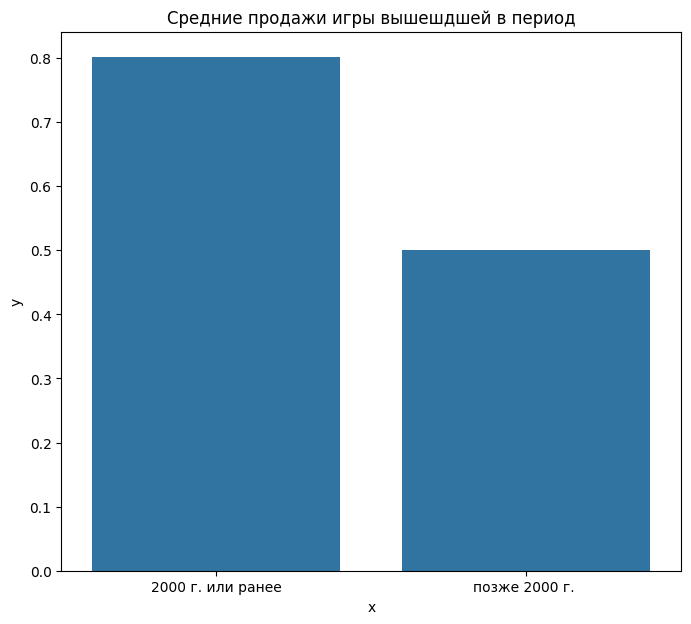

In [19]:
datal2000 = data[data['Year'] <= 2000]
datagr2000 = data[data['Year'] > 2000]

plt.figure(figsize=(8,7)) 
d = {'x': ['2000 г. или ранее', 'позже 2000 г. '], 
     'y': [datal2000['Global_Sales'].mean(), datagr2000['Global_Sales'].mean()]}
sns.barplot(x='x', y='y', data=d).set_title('Средние продажи игры вышешдшей в период')
plt.show()

Видим, что средние продажи игры, выпущенной до 2000 г. больше, чем для игры, выпущенной после 2000 г. Значит, гипотеза неверна.

Думаю уменьшение средних продаж связано с тем, что позже 2000 г. больше игр было выпущено, и скорее всего больше игр имели продажи меньше 1 млн. Проверим это.

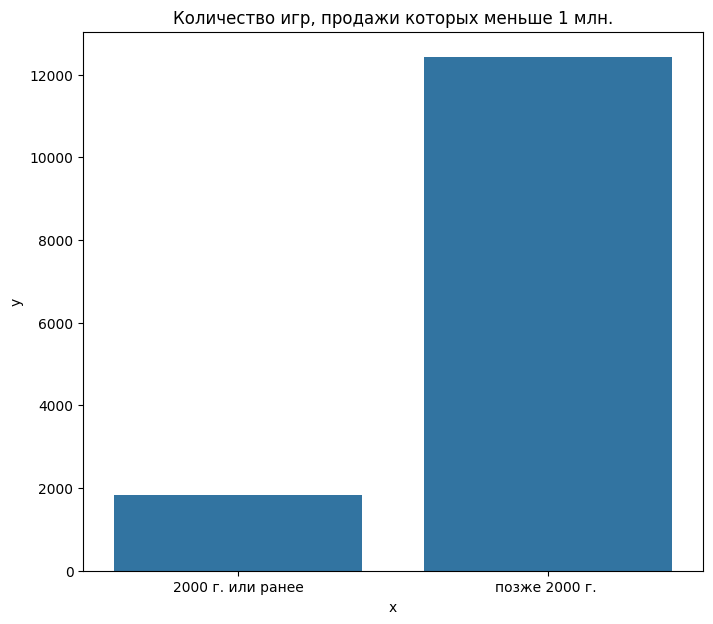

In [20]:
plt.figure(figsize=(8,7)) 
d = {'x': ['2000 г. или ранее', 'позже 2000 г. '], 
     'y': [datal2000[datal2000['Global_Sales'] <= 1].count()['Global_Sales'], datagr2000[datagr2000['Global_Sales'] <= 1].count()['Global_Sales']]}
sns.barplot(x='x', y='y', data=d).set_title('Количество игр, продажи которых меньше 1 млн.')
plt.show()

Действительно после 2000 г. количество непопулярных игр выросло в 6 раз по сравнению с играми, выпущенными в 2000 г. или раньше.

### Во все года продаж в Америке и Европе суммарно больше чем в Японии и в других странах вместе взятых.

Построим сразу график, в котором будет информация по каждому году.

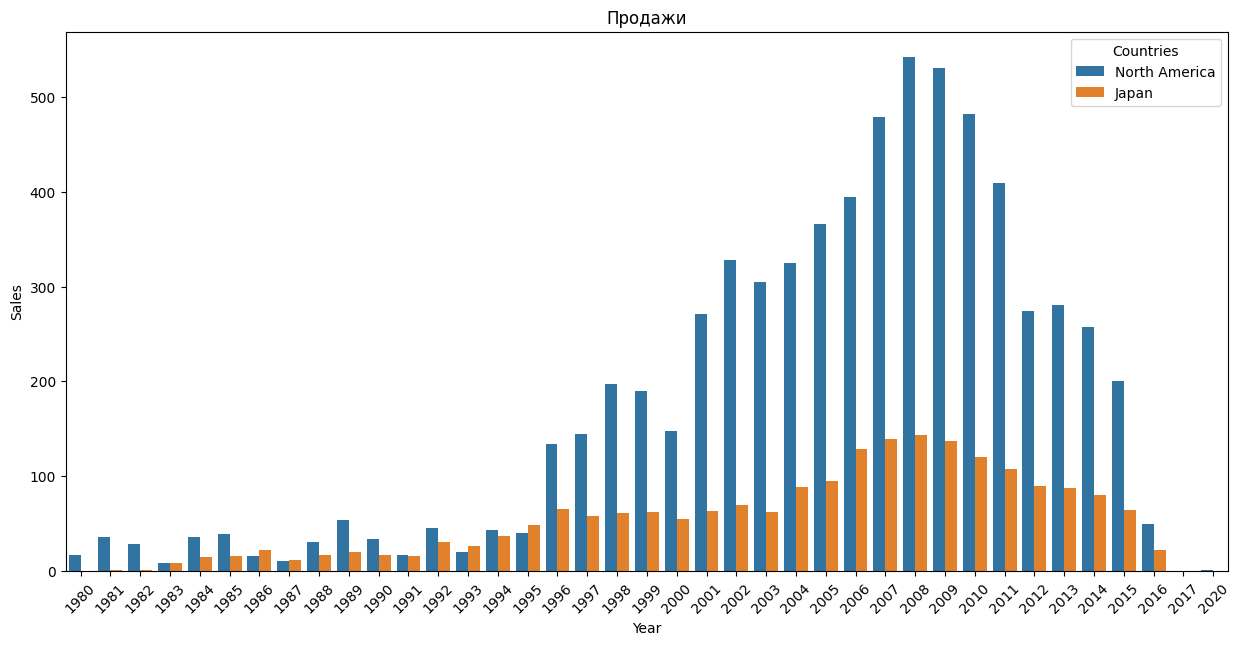

In [21]:
data['NA_plus_Eur'] = data['NA_Sales'] + data['EU_Sales']
data['Jp_plut_others'] = data['JP_Sales'] + data['Other_Sales']
df = data[['Year','NA_plus_Eur','Jp_plut_others']]
dt = df.groupby(by="Year").sum()
dt = dt.reset_index()

df = pd.melt(dt[['Year','NA_plus_Eur', 'Jp_plut_others']], id_vars="Year", var_name="Countries", value_name="Sales")

plt.figure(figsize=(15,7)) 
ax = sns.barplot(x = 'Year', y = 'Sales', hue = 'Countries', data = df)
ax.set_title('Продажи')
plt.xticks(rotation=45)
labels=["North America","Japan"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Countries")
plt.show()

Продажи в Америке и Европе суммарно почти в каждой год больше, чем в Японии и остальных странах за исключением 1993 г. и 1995 г. Более подробно посмотрим, какие игры вышли в эти 2 года.

In [22]:
games = data[((data['Year'] == 1995) | (data['Year'] == 1993)) & (data['NA_plus_Eur'] < data['Jp_plut_others'])][['Name', 'Year', 'NA_plus_Eur','Jp_plut_others']]
games.head(15)

Name  Year  NA_plus_Eur  Jp_plut_others
426   Dragon Quest VI: Maboroshi no Daichi  1995         0.00            3.19
670                   Kirby's Dream Land 2  1995         0.83            1.53
688                         Chrono Trigger  1995         0.28            2.03
849                Super Street Fighter II  1993         0.68            1.32
888                       Virtua Fighter 2  1995         0.60            1.33
948                         Secret of Mana  1993         0.32            1.51
1054                       Super Puyo Puyo  1993         0.00            1.70
1325                         Dragon Ball Z  1993         0.00            1.45
1521                      Romancing SaGa 3  1995         0.00            1.30
1674       Dragon Ball Z: La Legende Saien  1993         0.00            1.20
1729                      Romancing SaGa 2  1993         0.00            1.17
1753               Sega Rally Championship  1995         0.37            0.79
1771                    Derby Stallion III  1995         0.00            1.15
1777                   Dragon Quest I & II  1993         0.00            1.15
1840                           Arc the Lad  1995         0.00            1.11

In [23]:
games.shape

(203, 4)

Всего 203 игры 1993 г. или 1995 г. для которых продажи в Америке и Европе меньше, чем в Японии и других странах. Если поискать информацию про некоторые из них, то появляется ощущение, что большинство разработчиков этих игр из Японии и скорее всего поэтому больше продаж было в стране разработчика.

### У какого издателя больше всего продаж? Какие средние продажи у 5 наиболее крупных издателей?

In [24]:
data

Name Platform  Year  \
0                                            Wii Sports      Wii  2006   
1                                     Super Mario Bros.      NES  1985   
2                                        Mario Kart Wii      Wii  2008   
3                                     Wii Sports Resort      Wii  2009   
4                              Pokemon Red/Pokemon Blue       GB  1996   
...                                                 ...      ...   ...   
16593                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16594                     Men in Black II: Alien Escape       GC  2003   
16595  SCORE International Baja 1000: The Official Game      PS2  2008   
16596                                        Know How 2       DS  2010   
16597                                  Spirits & Spells      GBA  2003   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0            Sports    Nintendo     41.49     29.02      3.77         8.46   
1          Platform    Nintendo     29.08      3.58      6.81         0.77   
2            Racing    Nintendo     15.85     12.88      3.79         3.31   
3            Sports    Nintendo     15.75     11.01      3.28         2.96   
4      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16593      Platform       Kemco      0.01      0.00      0.00         0.00   
16594       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16595        Racing  Activision      0.00      0.00      0.00         0.00   
16596        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16597      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  NA_plus_Eur  Jp_plut_others  
0             82.74        70.51           12.23  
1             40.24        32.66            7.58  
2             35.82        28.73            7.10  
3             33.00        26.76            6.24  
4             31.37        20.16           11.22  
...             ...          ...             ...  
16593          0.01         0.01            0.00  
16594          0.01         0.01            0.00  
16595          0.01         0.00            0.00  
16596          0.01         0.01            0.00  
16597          0.01         0.01            0.00  

[16314 rows x 12 columns]

In [25]:
dt = data.groupby(by="Publisher").count()
df = data.groupby(by="Publisher")[['Global_Sales']].sum()
dt['Global_Sales'] = df['Global_Sales']
dt.rename(columns = {'Name':'Count'}, inplace = True)
dt['Mean'] = round(dt['Global_Sales']/dt['Count'], 2)

px.scatter(data_frame = dt, x = 'Count', y = dt.index, size = 'Global_Sales') 

Здесь по оси x откладывается количество выпущенных игр, а по оси y издатель. Видно, что у Electonic Arts больше всего выпущенных игр, затем идет Activision, Namco Bandai Games, Ubisoft и др. Размер кружка отвечает за продажи. Чем больше круг, тем больше и продаж. Здесь отчетливо видно, что самый большой круг соответствует издателю Nintendo. Причем Nintendo не находится в первой пятерке издателей по количеству игр. Это говорит о том, что на продажи влияет не только количество выпускаемых игр, но и другие факторы: рекламная кампания, доступность платформы, оценки игроков и изданий, наличие мультиплеера, выход дополнений и пр.

In [26]:
px.scatter(data_frame = dt, x = 'Count', y = dt.index, size = 'Global_Sales', color = 'Mean') 

Мне кажется, информативнее смотреть на средние продажи издателя. Цвет на графике выше соответствует среднему значению издателя. Чем цвет желтее, тем выше среднее значение. И если посмотреть на самых крупных издаетелей по количеству выпускаемых игр, то видно, что средние продажи у них меньше 1 за исключением Nintendo. 

In [27]:
px.scatter(data_frame = dt[dt['Count'] > 5], x = 'Mean', y = dt[dt['Count'] > 5].index, color = 'Count') 

Если на оси X откладывать значение среднего, на оси Y - издателя, а цветом обозначать количество игр, то график изменится. Видно, что Nintendo находится правее остальных издателей, которые выпустили как минимум 6 игр. После Nintendo идут издатели: Sony Computer Entertainment Europe, Microsoft Games Studios и др. - которые уже более-менее на слуху. Количество выпускаемых игр Sony Computer Entertainment Europe и Microsoft Games Studios суммарно намного меньше, чем у Nintendo, что говорит о том, что Nintendo довольно успешный издатель, если брать в расчет количество выпускаемых игр и средние продажи, потому что по обоим параметрам этот издатель занимает первые позиции. 

### Какой жанр пользуется большей популярностью по продажам на каждом промежутке длиной в 10 лет с 1980 г. по 2019 г.? Отличаются ли любимые жанры в Америке, в Европе, в Японии на каждом промежутке?

Построим графики для каждому периода. Период можно выбирать и переключать. Также график можно приближать.

In [28]:
df = data[data['Year'] < 2020][['Year','Name','Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
period_length = 10
start_year = 1980
end_year = 2019
starts = np.arange(start_year, end_year, period_length).tolist()
tuples = [(start, start+period_length) for start in starts]
bins = pd.IntervalIndex.from_tuples(tuples, closed='left')
original_labels = list(bins.astype(str))
new_labels = ['{} - {}'.format(b.strip('[)').split(', ')[0], int(b.strip('[)').split(', ')[1])-1) for b in original_labels]
label_dict = dict(zip(original_labels, new_labels))
df['PERIOD'] = pd.cut(df['Year'], bins=bins, include_lowest=True, precision=0)
df['PERIOD'] = df['PERIOD'].astype("str")
df = df.replace(label_dict)
px.box(df, x = 'Genre', y = 'Global_Sales', color = 'PERIOD', hover_name = 'Name')

Для каждого жанра и на каждом периоде посмотрим на медианы. Жанр у которого медиана наибольшая и будет считать самым популярным жанром периода.

Период 1980 - 1989: у жанра Adventure медиана самая большая - 2.39 млн.

Период 1990 - 1999: у жанра Platform медиана самая большая - 0.56 млн.

Период 2000 - 2009: у жанра Platform медиана самая большая - 0.22 млн.

Период 2010 - 2019: у жанра Shooter медиана самая большая - 0.41 млн.

Но при просмотре были замечаны интересные моменты по некоторым периодам, которые хочется отразить: 

Период 1980 - 1989: отсуствуют экстремально продаваемые игры жанра Adventure, Racing, Sports, Role-Playing, Fighting, Misc, Simulation. Игр жанра Strategy в данный период в данных нет. Причем максимально продаваемые игры жанров: Platform, Puzzle, Shooter (Super Mario Bros, Tetris, Duck Hunt игры соответственно) (даже я помню эти игры!).

Период 1990 - 1999: лидер по продажам этого периода стала игра Pokemon Red/Pokemon Blue жанра Role-Playing. После выхода этой игры появилось аниме про покемонов. Продолжения игр марио жанра Platform по прежнему много продаются.

Период 2000 - 2009: здесь абсолютный лидер по продажам Wii Sports. По данным ни одна другая игра не была настолько продаваемой, как она. Помимо этого у жанра Role-Playing повторно выпускают игры про покемонов, которые выбиваются по продажам по сравнению с остальными играми жанра Role-Playing

Период 2010 - 2019: появляются две игры Kinect Adventures! и Grand Theft Auto V жанров Misc и Action соответственно, которые по продажам не превосходят Tetris. Игры про марио и покемонов выходят до сих пор и по прежнему продаются в большом количестве.

In [29]:
px.box(df, x = 'Genre', y = 'NA_Sales', color = 'PERIOD', hover_name = 'Name')

In [30]:
px.box(df, x = 'Genre', y = 'EU_Sales', color = 'PERIOD', hover_name = 'Name')

In [31]:
px.box(df, x = 'Genre', y = 'JP_Sales', color = 'PERIOD', hover_name = 'Name')

При просмотри графиков для отдельных стран различий серьезных не наблюдалось по жанрам. Можно сказать, что популярные жанры у всех одинаковые.

### С каждым годом значения общих продаж увеличиваются. Какой тренд по странам?

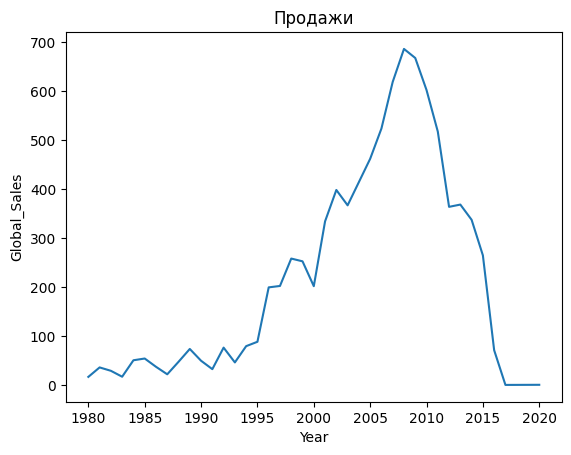

In [32]:
df = data[['Year', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']]
dt = df.groupby("Year").sum()
sns.lineplot(data = dt, x = dt.index, y = "Global_Sales").set_title('Продажи');

Значения продаж растут примерно до 2007 - 2009 года, а затем начинают спадать, поэтому значения продаж с каждый годом не увеличиваются. Наибольшее число продаж наблюдаются примерно в 2007 - 2009 г. Это связано вероятно с тем, что была выпущена одна из самых популярных игр Wii Sports, но и кроме этой игры выходили и другие игры. Они были менее популярные чем Wii Sports, но имели довольно высокие продажи. 

Посмотрим на тренд по странам.

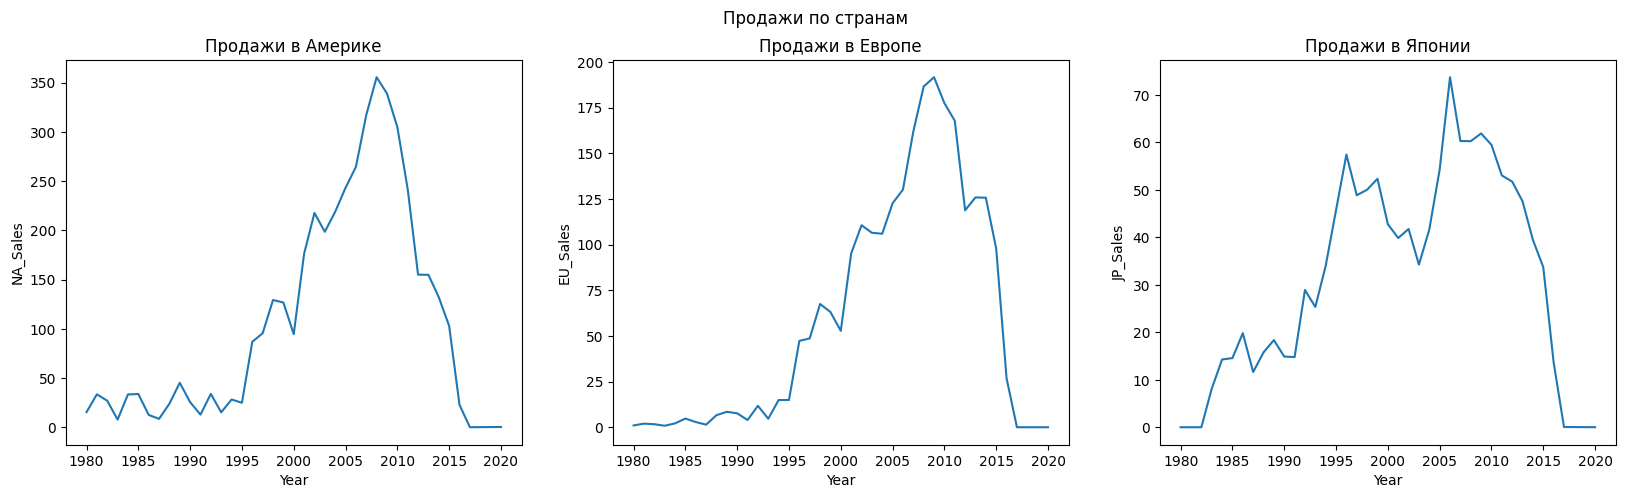

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Продажи по странам')


sns.lineplot(ax = axes[0], data = dt, x = "Year", y = 'NA_Sales')
axes[0].set_title('Продажи в Америке')


sns.lineplot(ax = axes[1], data = dt, x = "Year", y = 'EU_Sales')
axes[1].set_title('Продажи в Европе')


sns.lineplot(ax = axes[2],data = dt, x = "Year", y = 'JP_Sales')
axes[2].set_title('Продажи в Японии');

В принципе график продаж в Америке и в Европе мало отличается друг от друга, но в Японии продажи довольно высоки не только около 2007 - 2009 года, но в районе 1997 года. В период 1990 - 2000 гг. вышли впервые игры про покемонов, поэтому скорее всего их появление объясняет столь высокие продажи.

### Топ самых продаваемых игр в Америке, в Европе, в Японии и в остальных странах.

Для каждой страны построим график.

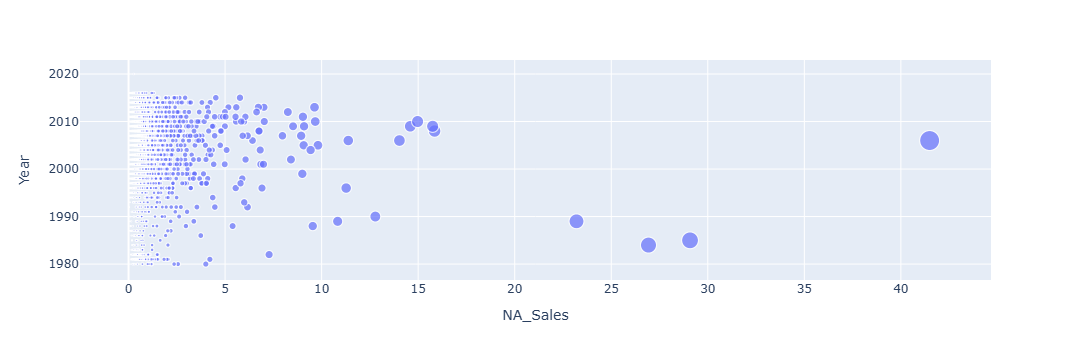

In [34]:
df = data[['Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
px.scatter(data_frame = df, x = 'NA_Sales', y = 'Year', size = 'NA_Sales', hover_name = 'Name')

Топ игр в Америке:

1) Wii Sports

2) Super Mario Bros.

3) Duck Hunt

4) Tetris

5) Mario Cart Wii

In [35]:
px.scatter(data_frame = df, x = 'EU_Sales', y = 'Year', size = 'EU_Sales', hover_name = 'Name')

Топ игр в Европе:

1) Wii Sports

2) Mario Cart Wii

3) Wii Sports Resort

4) Nintendogs

5) Grand Theft Auto V

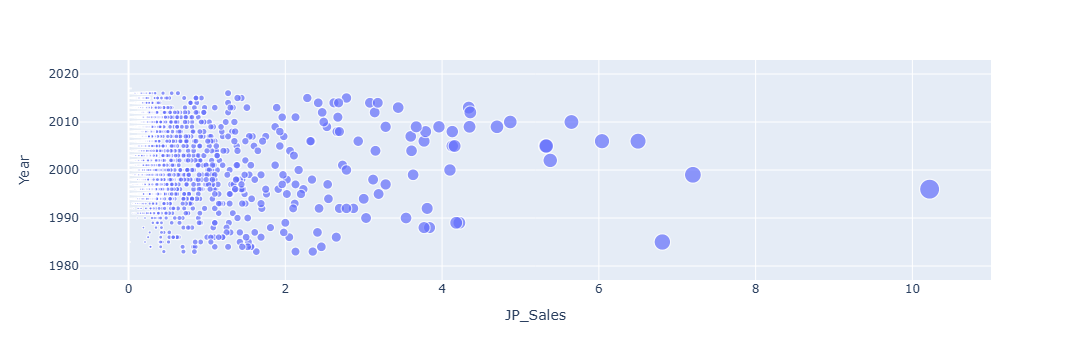

In [36]:
px.scatter(data_frame = df, x = 'JP_Sales', y = 'Year', size = 'JP_Sales', hover_name = 'Name')

Топ игр в Японии:

1) Pokemon Red/Pokemon Blue

2) Pokemon Gold/Pokemon Silver

3) Super Mario Bros.

4) New Super Mario Bros.

5) Pokemon Diamond/Pokemon Perl

Интересно, что Wii Sports не пользовалось большой популярностью в Японии, в отличие от других стран. Это говорит о культурных особенностях Японии, и разработчики должны учитывать это при создании игр, если хотят ориентироваться на Японский рынок.

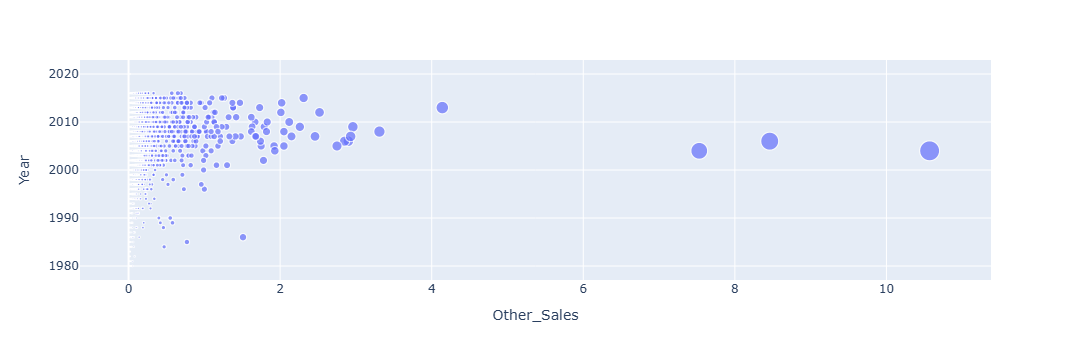

In [37]:
px.scatter(data_frame = df, x = 'Other_Sales', y = 'Year', size = 'Other_Sales', hover_name = 'Name')

Топ игр в других странах:

1) Grand Theft Auto: San Andreas

2) Wii Sports

3) Gran Turismo 4

4) Grand Theft Auto V

5) Mario Cart Wii

Различия действительно имеются между странами и они существенны, когда затргивают Японию. Похоже люди, которые придумали покемонов захватили всю страну своими играми :) 

### Итог

Еще раз напишу все вопросы и гипотезы, которые я в проекте исследовал.

1) Cколько всего продаж у каждой платформы? Какой тренд продаж у 10 наиболее крупных платформ?

2) У игры появившейся позже 2000 г. в среднем продаж больше, чем у игры, выпущенной ранее 2000 г.

3) Во все года продаж в Америке и Европе суммарно больше чем в Японии и в других странах вместе взятых.

4) У какого издателя больше всего продаж? Какие средние продажи у 5 наиболее крупных издателей?

5) Какой жанр пользуется большей популярностью по продажам на каждом промежутке длиной в 10 лет с 1980 г. по 2019 г.? Отличаются ли любимые жанры в Америке, в Европе, в Японии на каждом промежутке?

6) С каждым годом значения общих продаж увеличиваются. Какой тренд по странам?

7) Топ самых продаваемых игр в Америке, в Европе, в Японии и в остальных странах.

____

На каждый вопрос был дан ответ и каждая гипотеза рассматривалась в работе. Кратко продублируем ответы на поставленные вопросы и выводы, которые были получены:

1) Была выведена таблица с продажами отсортированная по убыванию общих продаж, также была нарисована столбчатая диаграмма для всех платформ. Для 10 крупных платформ были построены графики трендов и выделены три крупные платформы PC, DS, PS(1-4). При этом была замечана схожесть в спадающем тренде для каждой платформы из десятки крупных.

2) Это оказалось не так и причина в том, что после 2000 г. было выпущено в 6 раз больше игр у которых продажи меньше 1 млн. по сравнению с периодом до 2000 г.

3) Это верно за исключением 1993 г. и 1995 г. В эти два года были выпущены в основном игры у которых продажи в Японии были больше, чем в остальных странах, и эти игры были разработаны японцами.

4) Больше всего продаж у Nintendo. Для средних продаж был построен график на котором можно увидеть характеристику не только для 5 наиболее крупных производителей, но и для остальных.

5) Популярность жанра на каждом периоде определялась медианой, чтобы не сильно зависеть от выбросов (эксатремально продаваемых игр). 

    Период 1980 - 1989: у жанра Adventure медиана самая большая - 2.39 млн.
    Период 1990 - 1999: у жанра Platform медиана самая большая - 0.56 млн.
    Период 2000 - 2009: у жанра Platform медиана самая большая - 0.22 млн.
    Период 2010 - 2019: у жанра Shooter медиана самая большая - 0.41 млн.

    Отличия по жанрам среди стран были не замечены.

6) Был построен график, на котором отчетливо видно, что это не так. Пик продаж наблюдался в момент выхода игры Wii Sports, а затем тренд спадающий. По странам существенное отличие возникло только в Японии, графики для Америки и Европы совпадали практически.

7)  

    Топ игр в Америке: 
    1) Wii Sports 
    2) Super Mario Bros. 
    3) Duck Hunt 
    4) Tetris 
    5) Mario Cart Wii

    Топ игр в Европе:
    1) Wii Sports
    2) Mario Cart Wii
    3) Wii Sports Resort
    4) Nintendogs
    5) Grand Theft Auto V

    Топ игр в Японии:
    1) Pokemon Red/Pokemon Blue
    2) Pokemon Gold/Pokemon Silver
    3) Super Mario Bros.
    4) New Super Mario Bros.
    5) Pokemon Diamond/Pokemon Perl

    Топ игр в других странах:
    1) Grand Theft Auto: San Andreas
    2) Wii Sports
    3) Gran Turismo 4
    4) Grand Theft Auto V
    5) Mario Cart Wii